### SciPy versus NumPy

In [1]:
# Import numpy symbols to scipy namespace
from numpy import *
from numpy.random import rand, randn
from numpy.fft import fft, ifft
from numpy.lib.scimath import *

In [2]:
import numpy as np
a = np.identity(3)

### Statistics

#### Random Variables and Distributions

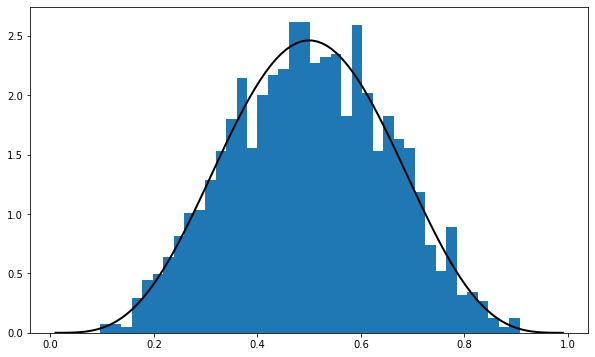

In [3]:
%matplotlib inline
from scipy.stats import beta
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10,6)

q = beta(5, 5) # Beta(a, b), with a = b = 5
obs = q.rvs(2000) # 2000 observations
grid = np.linspace(0.01, 0.99, 100)

fig, ax = plt.subplots()
ax.hist(obs, bins=40, density=True)
ax.plot(grid, q.pdf(grid), 'k-', linewidth=2)
plt.show()

In [4]:
q.cdf(0.4) # Cumulative distribution function

0.26656768000000003

In [5]:
q.ppf(0.8) # Quantile (inverse cdf) function

0.6339134834642708

In [6]:
q.mean()

0.5

#### Alternative Syntax

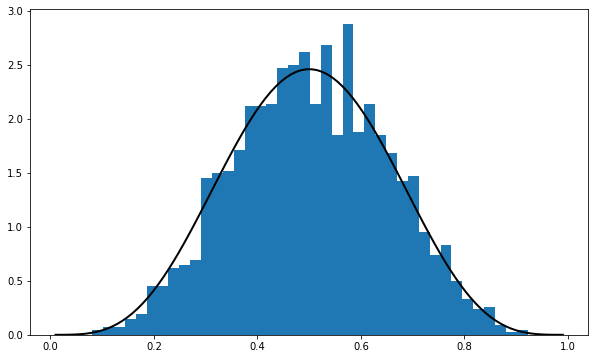

In [7]:
obs = beta.rvs(5, 5, size=2000)
grid = np.linspace(0.01, 0.99, 100)

fig, ax = plt.subplots()
ax.hist(obs, bins=40, density=True)
ax.plot(grid, beta.pdf(grid, 5, 5), 'k-', linewidth=2)
plt.show()

In [8]:
from scipy.stats import linregress

x = np.random.randn(200)
y = 2 * x + 0.1 * np.random.randn(200)
gradient, intercept, r_value, p_value, std_err = linregress(x, y)
gradient, intercept

(1.9861128985181333, -0.003934191310647095)

### Roots and Fixed Points

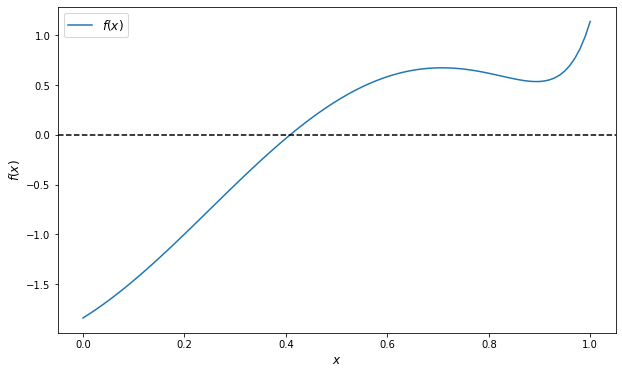

In [9]:
f = lambda x: np.sin(4 * (x - 1/4)) + x + x**20 - 1
x = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
ax.plot(x, f(x), label='$f(x)$')
ax.axhline(ls='--', c='k')
ax.set_xlabel('$x$', fontsize=12)
ax.set_ylabel('$f(x)$', fontsize=12)
ax.legend(fontsize=12)
plt.show()

#### Bisection

In [10]:
def bisect(f, a, b, tol=10e-5):
    """
    Implements the bisection root finding algorithm, assuming that f is a
    real-valued function on [a, b] satisfying f(a) < 0 < f(b).
    """

    lower, upper = a, b
    while upper - lower > tol:
        middle = 0.5 * (upper + lower)
        if f(middle) > 0: # root is between lower and middle
            lower, upper = lower, middle
        else: # root is between middle and upper
            lower, upper = middle, upper
    
    return 0.5 * (upper + lower)

In [11]:
bisect(f, 0, 1)

0.408294677734375

In [12]:
from scipy.optimize import bisect

bisect(f, 0, 1)

0.4082935042806639

#### The Newton-Raphson Method

In [13]:
from scipy.optimize import newton

newton(f, 0.2) # Start the search at initial condition x = 0.2

0.40829350427935673

In [14]:
newton(f, 0.7) # Start the search at x = 0.7 instead

0.7001700000000279

#### Hybrid Methods

In [15]:
from scipy.optimize import brentq

brentq(f, 0, 1)

0.40829350427936706

In [16]:
%timeit brentq(f, 0, 1)

18.1 µs ± 937 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [17]:
%timeit bisect(f, 0, 1)

65.4 µs ± 2.09 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


#### Fixed Points

In [18]:
from scipy.optimize import fixed_point

fixed_point(lambda x: x**2, 10.0) # 10.0 is an initial guess

array(1.)

### Optimization

In [19]:
from scipy.optimize import fminbound

fminbound(lambda x: x**2, -1, 2) # Search in [-1, 2]

0.0

### Integration

In [20]:
from scipy.integrate import quad

integral, error = quad(lambda x: x**2, 0, 1)
integral

0.33333333333333337

### Exercises

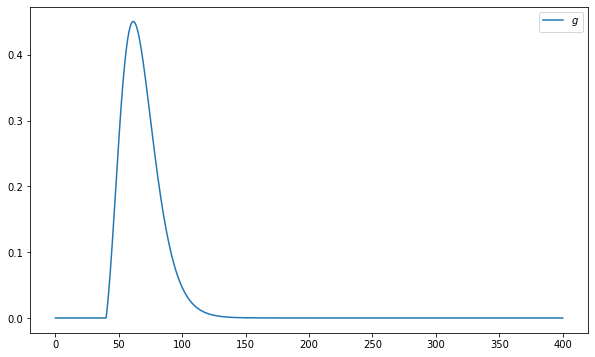

In [21]:
from scipy.integrate import quad
from scipy.stats import lognorm

μ, σ, β, n, K = 4, 0.25, 0.99, 10, 40

def g(x):
    return β**n * np.maximum(x - K, 0) * lognorm.pdf(x, σ, scale=np.exp(μ))

x_grid = np.linspace(0, 400, 1000)
y_grid = g(x_grid)

fig, ax = plt.subplots()
ax.plot(x_grid, y_grid, label="$g$")
ax.legend()
plt.show()

In [22]:
P, error = quad(g, 0, 1_000)
print(f"The numerical integration based option price is {P:.3f}")

The numerical integration based option price is 15.188


In [23]:
M = 10_000_000
S = np.exp(μ + σ * np.random.randn(M))
return_draws = np.maximum(S - K, 0)
P = β**n * np.mean(return_draws)
print(f"The Monte Carlo option price is {P:3f}")

The Monte Carlo option price is 15.187068


In [24]:
def bisect(f, a, b, tol=10e-5):
    """
    Implements the bisection root-finding algorithm, assuming that f is a
    real-valued function on [a, b] satisfying f(a) < 0 < f(b).
    """

    lower, upper = a, b
    if upper - lower < tol:
        return 0.5 * (upper + lower)
    
    else:
        middle = 0.5 * (upper + lower)
        print(f'Current mid point = {middle}')
        if f(middle) > 0: # Implies root is between lower and middle
            return bisect(f, lower, middle)
        
        else: # Implies root is between middle and upper
            return bisect(f, middle, upper)

In [25]:
f = lambda x: np.sin(4 * (x - 0.25)) + x + x**20 - 1
bisect(f, 0, 1)

Current mid point = 0.5
Current mid point = 0.25
Current mid point = 0.375
Current mid point = 0.4375
Current mid point = 0.40625
Current mid point = 0.421875
Current mid point = 0.4140625
Current mid point = 0.41015625
Current mid point = 0.408203125
Current mid point = 0.4091796875
Current mid point = 0.40869140625
Current mid point = 0.408447265625
Current mid point = 0.4083251953125
Current mid point = 0.40826416015625


0.408294677734375

### End.